In [1]:
import pandas as pd
import numpy as np

In [2]:
import scipy.stats as stat
import matplotlib.pyplot as plt

In [3]:
import scipy.optimize as optimize
import scipy.special as sp

In [4]:
import random as rand
import math
import copy as deepcopy
import copy

In [5]:
import scipy.integrate as integrate

In [6]:
import time

In [7]:
df = pd.read_csv('../Data_All_180906/CSV/Forecasting AI Progress v1.0.csv')

In [8]:
np.random.seed(12345678)

In [9]:
df = df.iloc[:,9:]

In [10]:
df.columns = ['name','surname','employer','job','Q1',
             'Q2','Q3','Q4','Q5a','Q5b','Q5c','Cq5','Q6a','Q6b',
             'Q6c','Cq6','Q7a','Q7b','Q7c','Q8a','Q8b','Q8c',
             'Cq7-8','Q9a','Q9b','Q9c','Q10a','Q10b','Q10c',
             'Cq9-10','Q11','Q12','Q13','Cq11-13']

In [11]:
dfx = pd.read_csv('../Data_All_180906/CSV/altdata.csv',keep_default_na=False)
dfx = pd.read_csv('../data_b.csv',keep_default_na=False)
df4 = dfx.iloc[:,7:]
df4.columns = ['role','demo','name','surname','employer','job','Q1',\
             'Q2','Q3','Q4','Q5a','Q5b','Q5c','Cq5','Q6a','Q6b',
             'Q6c','Cq6','Q7a','Q7b','Q7c','Q8a','Q8b','Q8c',
             'Cq7-8','Q9a','Q9b','Q9c','Q10a','Q10b','Q10c',
             'Cq9-10','Q11','Q12','Q13','Cq11-13','expert']
experts = df4.expert
demo = df4.demo
roles = df4.role
demo = np.asarray(demo)
roles = np.asarray(roles)
print(demo.shape)
print(roles.shape)
role = np.zeros(demo.shape[0]+1)
region = np.zeros(demo.shape[0]+1)
gender = np.zeros(demo.shape[0]+1)
experts = np.asarray(experts)
expert = np.zeros(demo.shape[0]+1)
for i in range(0,demo.shape[0]-1):
    try:
        vals = demo[i+1].split(',')
        #print (vals)
        if vals[0] == 'EU':
            region[i+1] = 0
        elif vals[0] == 'A':
            region[i+1] = 1
        elif vals[0] == 'NA':
            region[i+1] = 2
        elif vals[0] == 'O':
            region[i+1] = 3
        elif vals[0] == 'X':
            region[i+1] = -1
        elif vals[0] == 'SA':
            region[i+1] = 3
        elif vals[0] == 'AR':
            region[i+1] = 3
        else:
            region[i+1] = -1
        try:
            if vals[1] == 'f':
                gender[i+1] = 0
            else:
                gender[i+1] = 1
        except:
            gender[i+1] = 1
    except:
        region[i+1] = -1
        gender[i+1] = -1
    if roles[i+1] == 'phd': #grad student
        role[i+1] = 0
    elif roles[i+1] == 'prof': #academic
        role[i+1] = 1
    elif roles[i+1] == 'r': #industry research
        role[i+1] = 2
    elif roles[i+1] == 'eng': #industry engineer
        role[i+1] = 3
    elif roles[i+1] == 'exec': #industry executive
        role[i+1] = 4
    elif roles[i+1] == 'f': #founder
        role[i+1] = 5
    elif roles[i+1] == 'x':
        role[i+1] = 6
    else: role[i+1] = -1   
    if experts[i+1] == 'x' or experts[i+1] == 'na':
        expert[i+1] = -1
    else:
        expert[i+1] = 1
expert_df = pd.DataFrame(expert)
df['expert'] = expert_df
region_df = pd.DataFrame(region)
gender_df = pd.DataFrame(gender)
role_df = pd.DataFrame(role)
df['region'] = region_df
df['gender'] = gender_df
df['role'] = role_df

(230,)
(230,)


In [12]:
df = df.dropna(subset=['name','surname','employer','job'])

### Naive calibration A 

In [13]:
df['weight'] = 1.
df2 = df.iloc[1:]
df2.Q1 = pd.to_numeric(df2.Q1)
mask = df2.Q1 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q1 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25
df2.Q2 = pd.to_numeric(df2.Q2)
mask = df2.Q2 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q2 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25
df2.Q3 = pd.to_numeric(df2.Q3)
mask = df2.Q3 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q3 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25
df2.Q4 = pd.to_numeric(df2.Q4)
mask = df2.Q4 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q4 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Naive calibration B 

In [14]:
df3 = df.iloc[1:]
df3.Q1 = pd.to_numeric(df3.Q1)
mask = df3.Q1 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q1 == 100
df3.loc[mask, 'weight'] = 0.
df3.Q2 = pd.to_numeric(df3.Q2)
mask = df3.Q2 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q2 == 100
df3.loc[mask, 'weight'] = 0.
df3.Q3 = pd.to_numeric(df3.Q3)
mask = df3.Q3 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q3 == 100
df3.loc[mask, 'weight'] = 0.
df3.Q4 = pd.to_numeric(df3.Q4)
mask = df3.Q4 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q4 == 100
df3.loc[mask, 'weight'] = 0.

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
q1 = df.Q1
q2 = df.Q2
q3 = df.Q3
q4 = df.Q4
q5 = df[['Q5a','Q5b','Q5c']]
q6 = df[['Q6a','Q6b','Q6c']]
q7 = df[['Q7a','Q7b','Q7c']]
q8 = df[['Q8a','Q8b','Q8c']]
q9 = df[['Q9a','Q9b','Q9c']]
q10 = df[['Q10a','Q10b','Q10c']]
q11 = df.Q11
q12 = df.Q12
q13 = df.Q13

In [16]:
q1 = q1.dropna()
q2 = q2.dropna()
q3 = q3.dropna()
q4 = q4.dropna()
q5 = q5.dropna()
q6 = q6.dropna()
q7 = q7.dropna()
q8 = q8.dropna()
q9 = q9.dropna()
q10 = q10.dropna()
q11 = q11.dropna()
q12 = q12.dropna()
q13 = q13.dropna()

In [17]:
q10 = q10.iloc[1:]
q10 = q10.astype(float)
q10.head()

,Q10a,Q10b,Q10c
1,2028.0,2031.0,2034.0
3,2050.0,2100.0,2101.0
4,25.0,35.0,45.0
5,10.0,20.0,50.0
6,30.0,50.0,80.0


In [18]:
q10b = df2[['Q10a','Q10b','Q10c','weight']]
q10b = q10b.dropna()
q10b = q10b.astype(float)
q10b.head()

,Q10a,Q10b,Q10c,weight
1,2028.0,2031.0,2034.0,1.00
3,2050.0,2100.0,2101.0,1.00
4,25.0,35.0,45.0,1.00
5,10.0,20.0,50.0,0.75
6,30.0,50.0,80.0,1.00


In [19]:
q10c = df3[['Q10a','Q10b','Q10c','weight']]
q10c = q10c.dropna()
q10c = q10c.astype(float)
q10c.head()

,Q10a,Q10b,Q10c,weight
1,2028.0,2031.0,2034.0,1.0
3,2050.0,2100.0,2101.0,1.0
4,25.0,35.0,45.0,1.0
5,10.0,20.0,50.0,0.0
6,30.0,50.0,80.0,1.0


In [20]:
mask = q10.Q10a > 2000
mask2 = q10.Q10a < 3000
mask = mask*mask2
q10.loc[mask, 'Q10a'] = q10.Q10a - 2018
q10.loc[mask, 'Q10b'] = q10.Q10b - 2018
q10.loc[mask, 'Q10c'] = q10.Q10c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [21]:
mask = q10b.Q10a > 2000
mask2 = q10b.Q10a < 3000
mask = mask*mask2
q10b.loc[mask, 'Q10a'] = q10b.Q10a - 2018
q10b.loc[mask, 'Q10b'] = q10b.Q10b - 2018
q10b.loc[mask, 'Q10c'] = q10b.Q10c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [22]:
mask = q10c.Q10a > 2000
mask2 = q10c.Q10a < 3000
mask = mask*mask2
q10c.loc[mask, 'Q10a'] = q10c.Q10a - 2018
q10c.loc[mask, 'Q10b'] = q10c.Q10b - 2018
q10c.loc[mask, 'Q10c'] = q10c.Q10c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [23]:
q10d = df[['Q10a','Q10b','Q10c']]#,'role','gender','region']]
q10d = q10d[1:]
q10d = q10d.dropna()
q10d = q10d.astype(float)
mask = q10d.Q10a > 2000
mask2 = q10d.Q10a < 3000
mask = mask*mask2
q10d.loc[mask, 'Q10a'] = q10d.Q10a - 2018
q10d.loc[mask, 'Q10b'] = q10d.Q10b - 2018
q10d.loc[mask, 'Q10c'] = q10d.Q10c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


### Fitting to Gamma CDF 

In [24]:
#Manually handling extreme responses
extremeResponses = [14,56,100,102,120,134,164,222]

In [25]:
for i in extremeResponses:
    q10.loc[i]['Q10a'] = 1000
    q10.loc[i]['Q10b'] = 10000
    q10.loc[i]['Q10c'] = 100000

In [26]:
q10 = q10[q10.Q10c >= 0.000001]
q10 = q10[q10.Q10c-q10.Q10b >= 0.000001]
q10 = q10[q10.Q10c-q10.Q10a >= 0.000001]
q10 = q10[q10.Q10a <= 5000]
q10 = q10[q10.Q10b <= 5000]
q10 = q10[q10.Q10c <= 5000]
q10.shape[0]

142

In [27]:
for i in extremeResponses:
    q10b.loc[i]['Q10a'] = 1000
    q10b.loc[i]['Q10b'] = 10000
    q10b.loc[i]['Q10c'] = 100000

In [28]:
q10b = q10b[q10b.Q10c >= 0.000001]
q10b = q10b[q10b.Q10c-q10b.Q10b >= 0.000001]
q10b = q10b[q10b.Q10c-q10b.Q10a >= 0.000001]
q10b = q10b[q10b.Q10a <= 5000]
q10b = q10b[q10b.Q10b <= 5000]
q10b = q10b[q10b.Q10c <= 5000]
q10b.shape[0]

142

In [29]:
for i in extremeResponses:
    q10c.loc[i]['Q10a'] = 1000
    q10c.loc[i]['Q10b'] = 10000
    q10c.loc[i]['Q10c'] = 100000

In [30]:
q10c = q10c[q10c.Q10c >= 0.000001]
q10c = q10c[q10c.Q10c-q10c.Q10b >= 0.000001]
q10c = q10c[q10c.Q10c-q10c.Q10a >= 0.000001]
q10c = q10c[q10c.Q10a <= 5000]
q10c = q10c[q10c.Q10b <= 5000]
q10c = q10c[q10c.Q10c <= 5000]
q10c.shape[0]

142

In [31]:
for i in extremeResponses:
    q10d.loc[i]['Q10a'] = 1000
    q10d.loc[i]['Q10b'] = 10000
    q10d.loc[i]['Q10c'] = 100000
q10d = q10d[q10d.Q10c >= 0.000001]
q10d = q10d[q10d.Q10c-q10d.Q10b >= 0.000001]
q10d = q10d[q10d.Q10c-q10d.Q10a >= 0.000001]
q10d = q10d[q10d.Q10a <= 5000]
q10d = q10d[q10d.Q10b <= 5000]
q10d = q10d[q10d.Q10c <= 5000]
q10d.shape[0]

142

In [32]:
q10d.Q10a.median()

30.0

In [33]:
q10d.Q10b.median()

50.0

In [34]:
q10d.Q10c.median()

100.0

In [35]:
q10d.Q10a.mean()

57.75352112676056

In [36]:
q10d.Q10b.mean()

106.19718309859155

In [37]:
q10d.Q10c.mean()

218.73239436619718

In [38]:
ydata = [0.1,0.5,0.9]

In [39]:
xdata = np.asarray(q10)

In [40]:
def ff(params,xdata,ydata):
    return xdata-params[1]*sp.gammaincinv(params[0],ydata)

In [41]:
x0f = np.array([9.,1.])

In [42]:
xdata2 = copy.deepcopy(xdata)

In [43]:
paramsf = optimize.least_squares(ff, x0f, args=(xdata[0], ydata),max_nfev=10000,
                                tr_solver='exact')
datz = np.zeros(xdata.shape[0]*3)
dataxx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)  
for i in range(1000):
    if dataxx[i] > 5000.:
        dataxx[i] = 5000.
datz[0] = stat.gamma.ppf(.1, paramsf.x[0], 0., paramsf.x[1])
datz[1] = stat.gamma.ppf(.5, paramsf.x[0], 0., paramsf.x[1])
datz[2] = stat.gamma.ppf(.9, paramsf.x[0], 0., paramsf.x[1])
datayy = stat.gamma.cdf(dataxx,paramsf.x[0], 0., scale=paramsf.x[1])
for i in range(1,q10.shape[0]):
    paramsf = optimize.least_squares(ff, x0f, args=(xdata[i], ydata),max_nfev=1000,
                                tr_solver='exact')
    datz[i*3] = stat.gamma.ppf(.1, paramsf.x[0], 0., paramsf.x[1])
    datz[i*3+1] = stat.gamma.ppf(.5, paramsf.x[0], 0., paramsf.x[1])
    datz[i*3+2] = stat.gamma.ppf(.9, paramsf.x[0], 0., paramsf.x[1])
    dataxx = np.concatenate((dataxx,stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)),axis=0)
    datayy = np.concatenate((datayy,stat.gamma.cdf(dataxx[i*1000:],paramsf.x[0], 0., scale=paramsf.x[1])),axis=0)

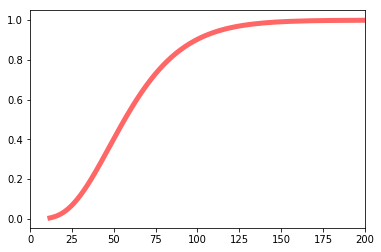

28.313656065945192
56.46301875841201
99.13194459178949


In [44]:
m10 = np.median(datz[::3])
m50 = np.median(datz[1::3])
m90 = np.median(datz[2::3])
paramsz = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                tr_solver='exact')
datzx = stat.gamma.rvs(paramsz.x[0], 0., scale=paramsz.x[1], size=1000)  
for i in range(1000):
    if datzx[i] > 5000.:
        datzx[i] = 5000.
datzy = stat.gamma.cdf(datzx,paramsz.x[0], 0., scale=paramsz.x[1])
datzx.sort()
datzx[-1] = 200.
plt.plot(datzx, stat.gamma.cdf(datzx, paramsz.x[0], 0., paramsz.x[1]),'r-', lw=5, alpha=0.6, label='gamma cdf')
plt.xlim(0,200)
plt.show()
print(stat.gamma.ppf(.1, paramsz.x[0], 0., paramsz.x[1]))
print(stat.gamma.ppf(.5, paramsz.x[0], 0., paramsz.x[1]))
print(stat.gamma.ppf(.9, paramsz.x[0], 0., paramsz.x[1]))

In [45]:
no6x = pd.read_csv('no6x.csv')
no7x = pd.read_csv('no7x.csv')
no8x = pd.read_csv('no8-x.csv')
no9x = pd.read_csv('no9x.csv')
no6y = pd.read_csv('no6y.csv')
no7y = pd.read_csv('no7y.csv')
no8y = pd.read_csv('no8-y.csv')
no9y = pd.read_csv('no9y.csv')

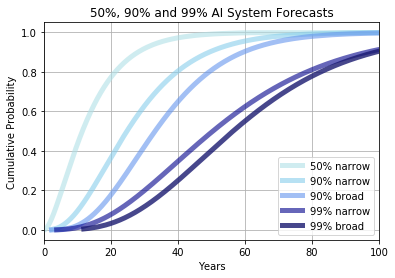

In [46]:
plt.plot(no6x['0'], no6y['0'],'powderblue', lw=5, alpha=0.6, label='50% narrow')
plt.plot(no7x['0'], no7y['0'],'skyblue', lw=5, alpha=0.6, label='90% narrow')
plt.plot(no8x['0'], no8y['0'],'cornflowerblue', lw=5, alpha=0.6, label='90% broad')
plt.plot(no9x['0'], no9y['0'],'darkblue', lw=5, alpha=0.6, label='99% narrow')
plt.plot(datzx, stat.gamma.cdf(datzx, paramsz.x[0], 0., paramsz.x[1]),'midnightblue', lw=5, alpha=0.8, label='99% broad')
plt.xlim(0,100)
plt.xlabel('Years')
plt.ylabel('Cumulative Probability')
plt.title('50%, 90% and 99% AI System Forecasts')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('all-forecasts-colors.png')
plt.show()
plt.show()

## Conference Effects ***

In [47]:
q10c['conf'] = q10c.index
q10c.conf[q10c.index > 57] = 0
q10c.conf[q10c.index <= 57] = 1

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [48]:
xhlai = q10c[q10c.index <= 57]
xhlai = np.asarray(xhlai[['Q10a','Q10b','Q10c']])
xijcai = q10c[q10c.index > 57]
xijcai = np.asarray(xijcai[['Q10a','Q10b','Q10c']])

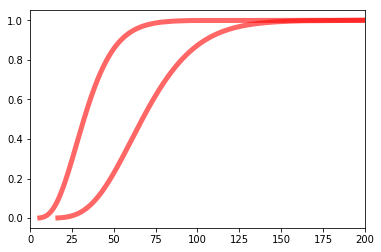

In [49]:
params1 = optimize.least_squares(ff, x0f, args=(xijcai[0], ydata),max_nfev=10000,
                                tr_solver='exact')
datx1 = stat.gamma.rvs(params1.x[0], 0., scale=params1.x[1], size=1000)  
datij = np.zeros(xijcai.shape[0]*3)
for i in range(1000):
    if datx1[i] > 5000.:
        datx1[i] = 5000.
datij[0] = stat.gamma.ppf(.1, params1.x[0], 0., params1.x[1])
datij[1] = stat.gamma.ppf(.5, params1.x[0], 0., params1.x[1])
datij[2] = stat.gamma.ppf(.9, params1.x[0], 0., params1.x[1])
daty1 = stat.gamma.cdf(datx1,params1.x[0], 0., scale=params1.x[1])
for i in range(1,xijcai.shape[0]):
    params1 = optimize.least_squares(ff, x0f, args=(xijcai[i], ydata),max_nfev=10000,
                                tr_solver='exact')
    datx1 = np.concatenate((datx1,stat.gamma.rvs(params1.x[0], 0., scale=params1.x[1], size=1000)),axis=0)
    daty1 = np.concatenate((daty1,stat.gamma.cdf(datx1[i*1000:],params1.x[0], 0., scale=params1.x[1])),axis=0)
    datij[i*3] = stat.gamma.ppf(.1, params1.x[0], 0., params1.x[1])
    datij[i*3+1] = stat.gamma.ppf(.5, params1.x[0], 0., params1.x[1])
    datij[i*3+2] = stat.gamma.ppf(.9, params1.x[0], 0., params1.x[1])

paramsxx1 = optimize.least_squares(ff, x0f, args=(datx1[:], daty1[:]),max_nfev=10000,
                                tr_solver='exact')
datx1.sort()    

params2 = optimize.least_squares(ff, x0f, args=(xhlai[0], ydata),max_nfev=10000,
                                tr_solver='exact')
datx2 = stat.gamma.rvs(params2.x[0], 0., scale=params2.x[1], size=1000)
dathl = np.zeros(xhlai.shape[0]*3)
for i in range(1000):
    if datx2[i] > 5000.:
        datx2[i] = 5000.
dathl[0] = stat.gamma.ppf(.1, params2.x[0], 0., params2.x[1])
dathl[1] = stat.gamma.ppf(.5, params2.x[0], 0., params2.x[1])
dathl[2] = stat.gamma.ppf(.9, params2.x[0], 0., params2.x[1])
daty2 = stat.gamma.cdf(datx2,params2.x[0], 0., scale=params2.x[1])
for i in range(1,xhlai.shape[0]):
    params2 = optimize.least_squares(ff, x0f, args=(xhlai[i], ydata),max_nfev=10000,
                                    tr_solver='exact')
    datx2 = np.concatenate((datx2,stat.gamma.rvs(params2.x[0], 0., scale=params2.x[1], size=1000)),axis=0)
    daty2 = np.concatenate((daty2,stat.gamma.cdf(datx2[i*1000:],params2.x[0], 0., scale=params2.x[1])),axis=0)    
    dathl[i*3] = stat.gamma.ppf(.1, params2.x[0], 0., params2.x[1])
    dathl[i*3+1] = stat.gamma.ppf(.5, params2.x[0], 0., params2.x[1])
    dathl[i*3+2] = stat.gamma.ppf(.9, params2.x[0], 0., params2.x[1])
paramsxx2 = optimize.least_squares(ff, x0f, args=(datx2[:], daty2[:]),max_nfev=10000,
                                tr_solver='exact')    
datx2.sort()
m10ij = np.median(datij[::3])
m50ij = np.median(datij[1::3])
m90ij = np.median(datij[2::3])
paramsij = optimize.least_squares(ff, x0f, args=([m10ij,m50ij,m90ij], ydata),max_nfev=10000,
                                tr_solver='exact')
datij = stat.gamma.rvs(paramsij.x[0], 0., scale=paramsij.x[1], size=1000)  
for i in range(1000):
    if datij[i] > 5000.:
        datij[i] = 5000.
datij.sort()
datij[-1] = 200.
datiy = stat.gamma.cdf(datij,paramsij.x[0], 0., scale=paramsij.x[1])
plt.plot(datij, stat.gamma.cdf(datij, paramsij.x[0], 0., paramsij.x[1]),'r-', lw=5, alpha=0.6, label='gamma cdf')
plt.xlim(0,200)
m10hl = np.median(dathl[::3])
m50hl = np.median(dathl[1::3])
m90hl = np.median(dathl[2::3])
paramshl = optimize.least_squares(ff, x0f, args=([m10hl,m50hl,m90hl], ydata),max_nfev=10000,
                                tr_solver='exact')
dathl = stat.gamma.rvs(paramshl.x[0], 0., scale=paramshl.x[1], size=1000)  
for i in range(1000):
    if dathl[i] > 5000.:
        dathl[i] = 5000.
dathl.sort()
dathl[-1] = 200.
dathy = stat.gamma.cdf(dathl,paramshl.x[0], 0., scale=paramshl.x[1])
plt.plot(dathl, stat.gamma.cdf(dathl, paramshl.x[0], 0., paramshl.x[1]),'r-', lw=5, alpha=0.6, label='gamma cdf')
plt.xlim(0,200)
plt.show()

In [50]:
print(stat.gamma.ppf(.1, paramshl.x[0], 0., paramshl.x[1]))
print(stat.gamma.ppf(.5, paramshl.x[0], 0., paramshl.x[1]))
print(stat.gamma.ppf(.9, paramshl.x[0], 0., paramshl.x[1]))

17.107566483608544
32.181849146294745
54.305168116168254


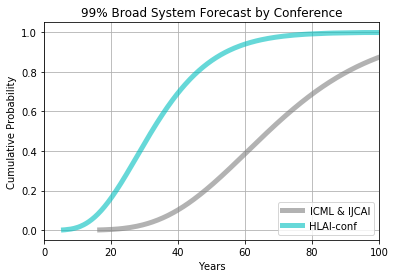

In [51]:
plt.plot(datij, stat.gamma.cdf(datij, paramsij.x[0], 0., paramsij.x[1]),'gray', lw=5, alpha=0.6, label='ICML & IJCAI')
plt.plot(dathl, stat.gamma.cdf(dathl, paramshl.x[0], 0., paramshl.x[1]),'c-', lw=5, alpha=0.6, label='HLAI-conf')
plt.xlim(0,200)
plt.xlabel('Years')
plt.ylabel('Cumulative Probability')
plt.title('99% Broad System Forecast by Conference')
plt.legend(loc='lower right')
plt.xlim(0,100)
plt.grid()
plt.savefig('conference-attended.png')
plt.show()

In [52]:
print(np.median(xhlai[:,0]))
print(np.median(xhlai[:,1]))
print(np.median(xhlai[:,2]))

20.0
35.0
50.0


In [53]:
print(np.mean(xhlai[:,0]))
print(np.mean(xhlai[:,1]))
print(np.mean(xhlai[:,2]))

24.853658536585368
46.073170731707314
106.58536585365853


In [54]:
print(np.std(xhlai[:,0]))
print(np.std(xhlai[:,1]))
print(np.std(xhlai[:,2]))

19.159867833458502
33.54675677239844
164.5226614400131


In [55]:
print(np.median(xijcai[:,1]))
print(np.mean(xijcai[:,1]))
print(np.std(xijcai[:,1]))
print(stat.gamma.ppf(.5, paramsij.x[0], 0., paramsij.x[1]))

70.0
130.6039603960396
232.00742900396128
67.03908657944986


## BOOTSTRAP

In [56]:
def gbootstrap(xdata):
    bstrap = np.zeros(xdata.shape)
    for i in range(xdata.shape[0]):
        randidx = rand.randrange(xdata.shape[0])
        dat = xdata[randidx,:]
        bstrap[i,:] = dat
    return bstrap

In [57]:
def compute_ci(intrp, confidence = 0.95):
    avg = np.zeros((intrp.shape[1]),dtype = 'float32')
    lb   = np.zeros((intrp.shape[1]),dtype = 'float32')
    up   = np.zeros((intrp.shape[1]),dtype = 'float32')
    pz = (1.0-confidence)/2.0
    print(intrp.shape)
    for i in range(intrp.shape[1]):
        vec = intrp[:,i]
        vec.sort()
        avg[i] = np.average(vec)
        lb[i] = vec[math.floor(pz*len(vec))]
        up[i] = vec[math.floor((1.0-pz)*len(vec))]
    return avg,lb,up

In [74]:
bootstrapsx = []
bootstrapsy = []
nbstraps = 10000
nrvars = 41
for i in range(nbstraps):
    bstrap = gbootstrap(xdata)
    iparams = np.array([9.,1.])
    m10 = np.median(bstrap[:,0])
    m50 = np.median(bstrap[:,1])
    m90 = np.median(bstrap[:,2])
    paramsf = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                    tr_solver='exact')        
    datx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)
    datx.sort()
    daty = stat.gamma.cdf(datx,paramsf.x[0], 0., scale=paramsf.x[1])
    bootstrapsx.append(datx)
    bootstrapsy.append(daty)
    if (i+1)%1000 == 0:
        print('Bootstrap '+str(i+1)+ ' of '+str(nbstraps)+'.')    

Bootstrap 1000 of 10000.
Bootstrap 2000 of 10000.
Bootstrap 3000 of 10000.
Bootstrap 4000 of 10000.
Bootstrap 5000 of 10000.
Bootstrap 6000 of 10000.
Bootstrap 7000 of 10000.
Bootstrap 8000 of 10000.
Bootstrap 9000 of 10000.
Bootstrap 10000 of 10000.


(10000, 200)


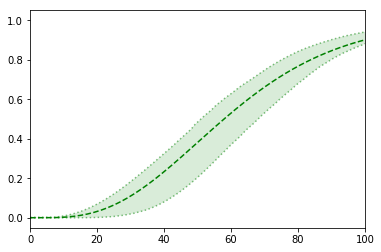

In [75]:
intrp_ = np.array([x*(201/200) for x in range(0,200)])
intrp = np.zeros((nbstraps,len(intrp_)), dtype = 'float32')
for i in range(nbstraps):
    intrp[i,:] = np.interp(intrp_, np.array(bootstrapsx[i]), np.array(bootstrapsy[i]))
avg, lb, ub = compute_ci(intrp, confidence = 0.90)
ax = plt.gca()
clr = 'green'
plt.plot(intrp_, avg, color=clr, ls='--', label="Average Sensitivity")
plt.plot(intrp_, lb, color=clr, ls=':', label="95% Confidence Intervals",alpha=0.5) # , label = "lb")
plt.plot(intrp_, ub, color=clr, ls=':',alpha=0.5) 
plt.xlim(0,100)
ax.fill_between(intrp_, lb, ub, facecolor=clr, alpha=0.15)
plt.show()

In [78]:
out = np.zeros((intrp_.shape[0],4))
for i in range(intrp_.shape[0]):
    out[i,0] = intrp_[i]
    out[i,1] = avg[i]
    out[i,2] = lb[i]
    out[i,3] = ub[i]
out = pd.DataFrame(out)
out.to_csv('no10.csv')

# AGGREGATED PLOTS

In [65]:
no6 = pd.read_csv('no6.csv')
intrp6 = np.asarray(no6.iloc[:,1])
avg6 = np.asarray(no6.iloc[:,2])
lb6 = np.asarray(no6.iloc[:,3])
ub6 = np.asarray(no6.iloc[:,4])

In [66]:
no7 = pd.read_csv('no7.csv')
intrp7 = np.asarray(no7.iloc[:,1])
avg7 = np.asarray(no7.iloc[:,2])
lb7 = np.asarray(no7.iloc[:,3])
ub7 = np.asarray(no7.iloc[:,4])

In [67]:
no8 = pd.read_csv('no8.csv')
intrp8 = np.asarray(no8.iloc[:,1])
avg8 = np.asarray(no8.iloc[:,2])
lb8 = np.asarray(no8.iloc[:,3])
ub8 = np.asarray(no8.iloc[:,4])

In [87]:
no9 = pd.read_csv('no9.csv')
intrp9 = np.asarray(no9.iloc[:,1])
avg9 = np.asarray(no9.iloc[:,2])
lb9 = np.asarray(no9.iloc[:,3])
ub9 = np.asarray(no9.iloc[:,4])

In [79]:
no10 = pd.read_csv('no10.csv')
intrp10 = np.asarray(no10.iloc[:,1])
avg10 = np.asarray(no10.iloc[:,2])
lb10 = np.asarray(no10.iloc[:,3])
ub10 = np.asarray(no10.iloc[:,4])

In [80]:
plt.clf()
ax = plt.gca()
clr = 'grey'
plt.plot(intrp_, avg, color=clr, ls='--', label="99% Broad Forecast")
plt.plot(intrp_, lb, color=clr, ls=':', label="95% Confidence Band",alpha=0.5) 
plt.plot(intrp_, ub, color=clr, ls=':',alpha=0.65)
ax.fill_between(intrp_, lb, ub, facecolor=clr, alpha=0.25)
clr = 'steelblue'
plt.plot(intrp8, avg8, color=clr, ls='--', label="90% Broad Forecast")
plt.plot(intrp8, lb8, color=clr, ls=':', label="95% Confidence Band",alpha=0.5) 
plt.plot(intrp8, ub8, color=clr, ls=':',alpha=0.65) 
ax.fill_between(intrp8, lb8, ub8, facecolor=clr, alpha=0.25)

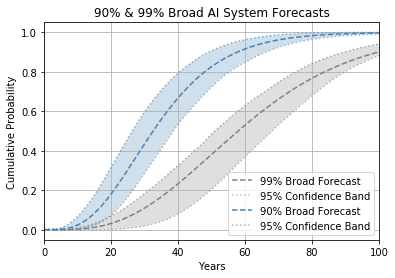

In [81]:
plt.xlabel('Years')
plt.ylabel('Cumulative Probability')
plt.title('90% & 99% Broad AI System Forecasts')
plt.legend(loc='lower right')
plt.grid()
plt.xlim(0,100)
plt.savefig('90-99-broad-cis.png')
plt.show()

In [88]:
plt.clf()
ax = plt.gca()
clr = 'midnightblue'
plt.plot(intrp9, avg9, color=clr, ls='--', label="99% Narrow Forecast")
plt.plot(intrp9, lb9, color=clr, ls=':', label="95% Confidence Band",alpha=0.5) # , label = "lb")
plt.plot(intrp9, ub9, color=clr, ls=':',alpha=0.65) # , label = "ub")
ax.fill_between(intrp9, lb9, ub9, facecolor=clr, alpha=0.25)
clr = 'cornflowerblue'
plt.plot(intrp7, avg7, color=clr, ls='--', label="90% Narrow Forecast")
plt.plot(intrp7, lb7, color=clr, ls=':', label="95% Confidence Band",alpha=0.5) # , label = "lb")
plt.plot(intrp7, ub7, color=clr, ls=':',alpha=0.65) # , label = "ub")
ax.fill_between(intrp7, lb7, ub7, facecolor=clr, alpha=0.25)
clr = 'powderblue'
plt.plot(intrp6, avg6, color=clr, ls='--', label="50% Narrow Forecast")
plt.plot(intrp6, lb6, color=clr, ls=':', label="95% Confidence Band",alpha=0.5) # , label = "lb")
plt.plot(intrp6, ub6, color=clr, ls=':',alpha=0.65) # , label = "ub")
ax.fill_between(intrp6, lb6, ub6, facecolor=clr, alpha=0.25)

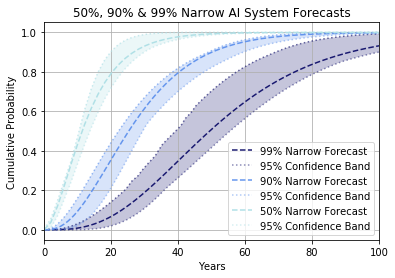

In [89]:
plt.xlabel('Years')
plt.ylabel('Cumulative Probability')
plt.title('50%, 90% & 99% Narrow AI System Forecasts')
plt.legend(loc='lower right')
plt.grid()
plt.xlim(0,100)
plt.savefig('50-99-narrow-cis.png')
plt.show()

# Conference Bootstrap

In [107]:
bootstrapsx = []
bootstrapsy = []
nbstraps = 10000
nrvars = 41
for i in range(nbstraps):
    bstrap = gbootstrap(xhlai)
    iparams = np.array([9.,1.])
    m10 = np.median(bstrap[:,0])
    m50 = np.median(bstrap[:,1])
    m90 = np.median(bstrap[:,2])
    paramsf = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                    tr_solver='exact')        
    datx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)
    datx.sort()
    daty = stat.gamma.cdf(datx,paramsf.x[0], 0., scale=paramsf.x[1])
    bootstrapsx.append(datx)
    bootstrapsy.append(daty)
    if (i+1)%1000 == 0:
        print('Bootstrap '+str(i+1)+ ' of '+str(nbstraps)+'.')

Bootstrap 1000 of 10000.
Bootstrap 2000 of 10000.
Bootstrap 3000 of 10000.
Bootstrap 4000 of 10000.
Bootstrap 5000 of 10000.
Bootstrap 6000 of 10000.
Bootstrap 7000 of 10000.
Bootstrap 8000 of 10000.
Bootstrap 9000 of 10000.
Bootstrap 10000 of 10000.


(10000, 200)


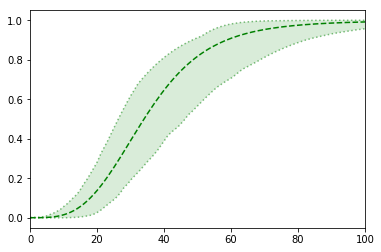

In [108]:
intrp_ = np.array([x*(201/200) for x in range(0,200)])
intrp = np.zeros((nbstraps,len(intrp_)), dtype = 'float32')
for i in range(nbstraps):
    intrp[i,:] = np.interp(intrp_, np.array(bootstrapsx[i]), np.array(bootstrapsy[i]))
avg, lb, ub = compute_ci(intrp, confidence = 0.90)
ax = plt.gca()
clr = 'green'
plt.plot(intrp_, avg, color=clr, ls='--', label="Average Sensitivity")
plt.plot(intrp_, lb, color=clr, ls=':', label="95% Confidence Intervals",alpha=0.5) # , label = "lb")
plt.plot(intrp_, ub, color=clr, ls=':',alpha=0.5) 
plt.xlim(0,100)
ax.fill_between(intrp_, lb, ub, facecolor=clr, alpha=0.15)
plt.show()

In [109]:
ihlai = copy.deepcopy(intrp_)

In [95]:
bootstrapsx = []
bootstrapsy = []
nbstraps = 10000
nrvars = 41
for i in range(nbstraps):
    bstrap = gbootstrap(xijcai)
    iparams = np.array([9.,1.])
    m10 = np.median(bstrap[:,0])
    m50 = np.median(bstrap[:,1])
    m90 = np.median(bstrap[:,2])
    paramsf = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                    tr_solver='exact')        
    datx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)
    datx.sort()
    daty = stat.gamma.cdf(datx,paramsf.x[0], 0., scale=paramsf.x[1])
    bootstrapsx.append(datx)
    bootstrapsy.append(daty)
    if (i+1)%1000 == 0:
        print('Bootstrap '+str(i+1)+ ' of '+str(nbstraps)+'.')

Bootstrap 1000 of 10000.
Bootstrap 2000 of 10000.
Bootstrap 3000 of 10000.
Bootstrap 4000 of 10000.
Bootstrap 5000 of 10000.
Bootstrap 6000 of 10000.
Bootstrap 7000 of 10000.
Bootstrap 8000 of 10000.
Bootstrap 9000 of 10000.
Bootstrap 10000 of 10000.


(10000, 200)


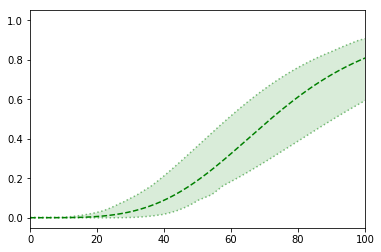

In [103]:
intrp_ = np.array([x*(201/200) for x in range(0,200)])
intrp = np.zeros((nbstraps,len(intrp_)), dtype = 'float32')
for i in range(nbstraps):
    intrp[i,:] = np.interp(intrp_, np.array(bootstrapsx[i]), np.array(bootstrapsy[i]))
avg9, lb9, ub9 = compute_ci(intrp, confidence = 0.90)
ax = plt.gca()
clr = 'green'
plt.plot(intrp_, avg9, color=clr, ls='--', label="Average Sensitivity")
plt.plot(intrp_, lb9, color=clr, ls=':', label="95% Confidence Intervals",alpha=0.5) # , label = "lb")
plt.plot(intrp_, ub9, color=clr, ls=':',alpha=0.5) 
plt.xlim(0,100)
ax.fill_between(intrp_, lb9, ub9, facecolor=clr, alpha=0.15)
plt.show()

In [104]:
iijcai = copy.deepcopy(intrp_)

In [112]:
plt.clf()
ax = plt.gca()
clr = 'darkcyan'
plt.plot(ihlai, avg, color=clr, ls='--', label="99% Broad HLAI")
plt.plot(ihlai, lb, color=clr, ls=':', label="95% Confidence Interval",alpha=0.5) # , label = "lb")
plt.plot(ihlai, ub, color=clr, ls=':',alpha=0.75) # , label = "ub")
ax.fill_between(ihlai, lb, ub, facecolor=clr, alpha=0.25)
clr = 'grey'
plt.plot(iijcai, avg9, color=clr, ls='--', label="99% Broad IJCAI")
plt.plot(iijcai, lb9, color=clr, ls=':', label="95% Confidence Interval",alpha=0.5) # , label = "lb")
plt.plot(iijcai, ub9, color=clr, ls=':',alpha=0.65) # , label = "ub")
ax.fill_between(iijcai, lb9, ub9, facecolor=clr, alpha=0.25)

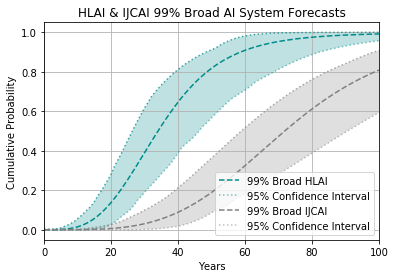

In [113]:
plt.xlabel('Years')
plt.ylabel('Cumulative Probability')
plt.title('HLAI & IJCAI 99% Broad AI System Forecasts')
plt.legend(loc='lower right')
plt.grid()
plt.xlim(0,100)
plt.savefig('Q10-hlai-ijcai-cis.png')
plt.show()